In [1]:
#importing all the required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import r2_score

In [2]:
#reading data file
df=pd.read_csv('housing.csv')

In [3]:
#displaying the records
df

,0.00632 18.00 2.310 0 0.5380 6.5750 65.20 4.0900 1 296.0 15.30 396.90 4.98 24.00
0,0.02731 0.00 7.070 0 0.4690 6.4210 78...
1,0.02729 0.00 7.070 0 0.4690 7.1850 61...
2,0.03237 0.00 2.180 0 0.4580 6.9980 45...
3,0.06905 0.00 2.180 0 0.4580 7.1470 54...
4,0.02985 0.00 2.180 0 0.4580 6.4300 58...
...,...
500,0.06263 0.00 11.930 0 0.5730 6.5930 69...
501,0.04527 0.00 11.930 0 0.5730 6.1200 76...
502,0.06076 0.00 11.930 0 0.5730 6.9760 91...
503,0.10959 0.00 11.930 0 0.5730 6.7940 89...


ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS: proportion of non-retail business acres per town
CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX: nitric oxides concentration (parts per 10 million)
RM: average number of rooms per dwelling
AGE: proportion of owner-occupied units built prior to 1940
DIS: weighted distances to five Boston employment centers
RAD: index of accessibility to radial highways
TAX: full-value property-tax rate per $10,000
PTRATIO: pupil-teacher ratio by town
B: 1000(Bk−0.63)² where Bk is the proportion of blacks by town
LSTAT: % lower status of the population
MEDV: Median value of owner-occupied homes in $1000s


In [4]:
#adding headers to the datframe
headers = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
           'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df= pd.read_csv('housing.csv', sep='\s+', names= headers)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [5]:
df.shape

(506, 14)

In [6]:
#checking null values in the dataframe
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [8]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [9]:
#finding correlation for all numeric values
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


C:\Users\poorn\AppData\Local\Temp\ipykernel_37924\2241734088.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['MEDV'], bins=30)


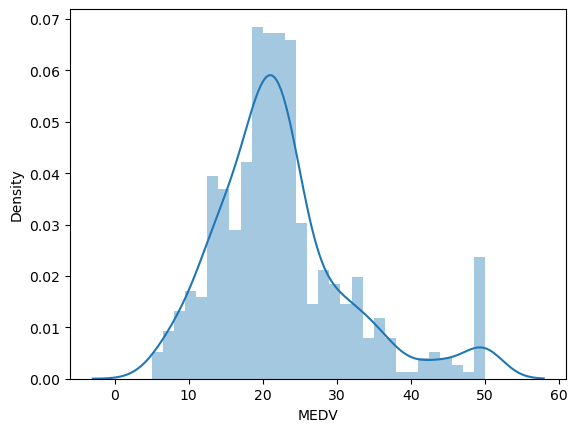

In [10]:
#plotting distributed plot for density of Median value of owner-occupied homes (MEDV)
sns.distplot(df['MEDV'], bins=30)
plt.show()

On average the distribution of the house prices are between 10 and 50 Thousand dollars.

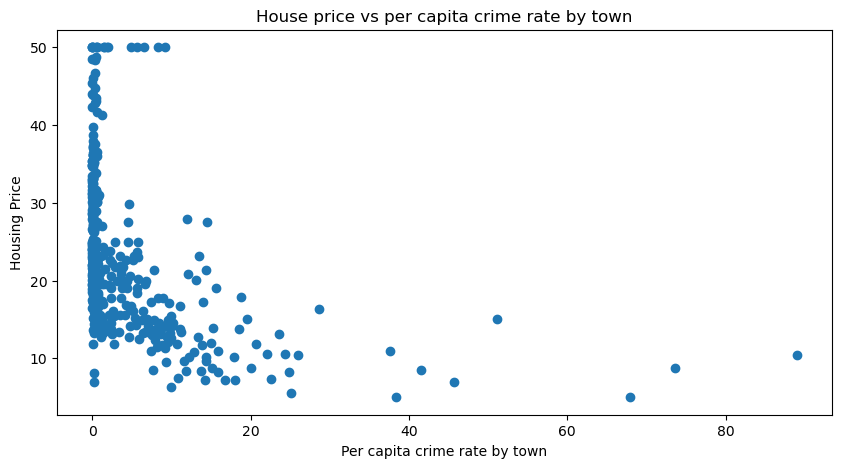

In [11]:
#House Price vs CRIME Rate by town
plt.figure(figsize=(10, 5))

plt.scatter(df.CRIM,df.MEDV)
plt.xlabel("Per capita crime rate by town")
plt.ylabel("Housing Price")
plt.title("House price vs per capita crime rate by town");

The plot says that if a neighborhood is safe (less crime), the houses there are more expensive, like between $12,000 and $40,000. But if a place has more crime, houses are cheaper. 
So, lower crime means costlier houses, and higher crime means cheaper houses.







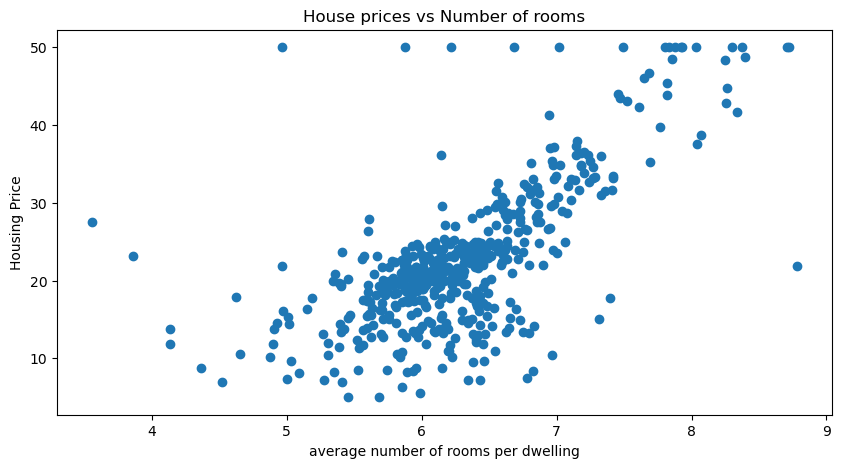

In [12]:
#Housing prices vs average number of rooms per dwelling
plt.figure(figsize=(10,5))
plt.scatter(df.RM,df.MEDV)
plt.xlabel("average number of rooms per dwelling")
plt.ylabel("Housing Price")
plt.title("House prices vs Number of rooms");


Most houses in our data cost around 20,000 to 30,000 usd  and have about 6 to 7 rooms. There are a few really big and expensive houses with more than 7 rooms, costing above 30,000, even up to 50,000 $

Text(0.5, 1.0, 'House prices vs five Boston employment centres')

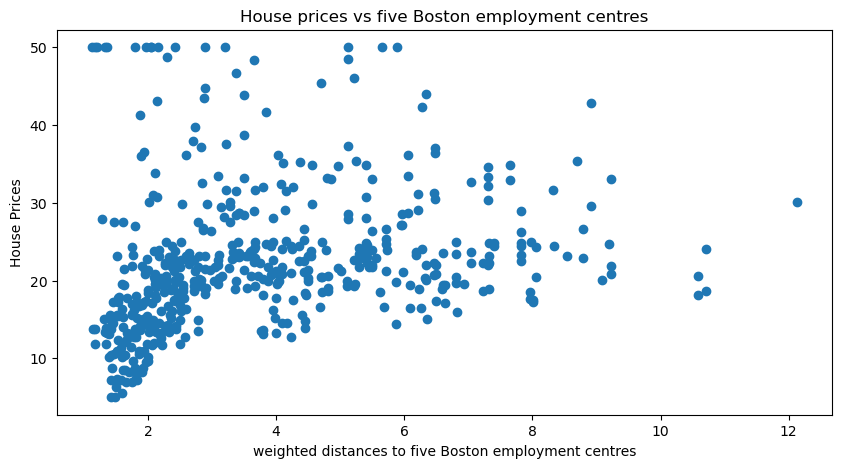

In [13]:
#Housing Prices vs 5 Boston employment centres
plt.figure(figsize=(10,5))
plt.scatter(df.DIS,df.MEDV)
plt.xlabel("weighted distances to five Boston employment centres")
plt.ylabel("House Prices")
plt.title("House prices vs five Boston employment centres")


Houses that cost between 5,000 and 30,000 $ in our data are usually not too far, like 1 to 6 units, from the 5 Boston job centers. If a house is close to where people work, it's more likely to be cheaper.







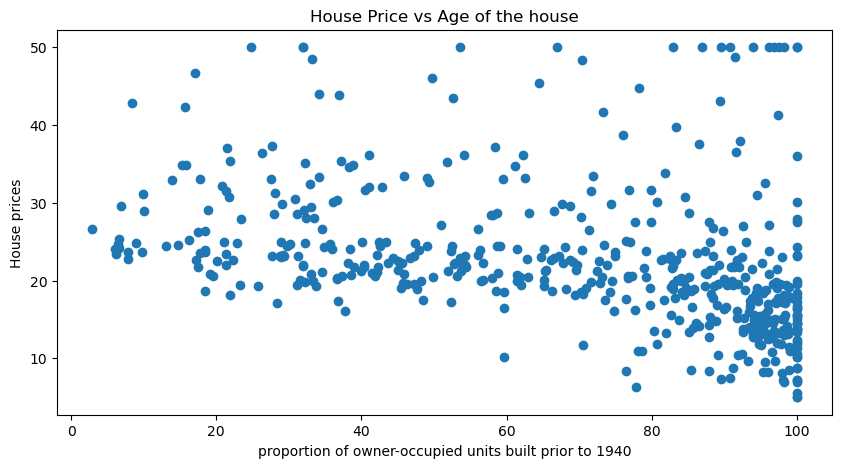

In [14]:
#Housing pricing vs to Age of the house
plt.figure(figsize=(10,5))
plt.scatter(df.AGE,df.MEDV)
plt.xlabel("proportion of owner-occupied units built prior to 1940")
plt.ylabel("House prices")
plt.title("House Price vs Age of the house");


In [15]:
min_value = df['AGE'].min()
max_value = df['AGE'].max()
print(f"Minimum value of 'ColumnA': {min_value}")
print(f"Maximum value of 'ColumnA': {max_value}")

Minimum value of 'ColumnA': 2.9
Maximum value of 'ColumnA': 100.0


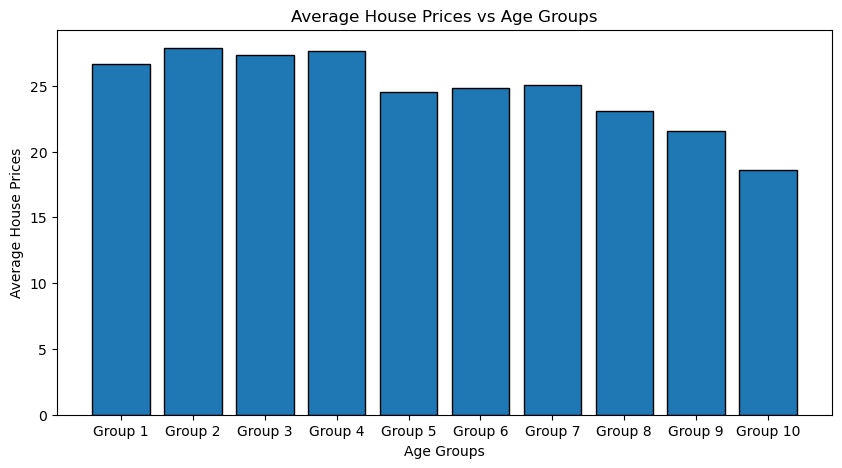

In [16]:
# Create age groups
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = [f'Group {i}' for i in range(1, 11)]
df['AgeGroup'] = pd.cut(df['AGE'], bins=bins, labels=labels, right=False)

# Calculate the average 'MEDV' for each age group
grouped_data = df.groupby('AgeGroup')['MEDV'].mean().reset_index()

# Plotting a bar chart
plt.figure(figsize=(10, 5))
plt.bar(grouped_data['AgeGroup'], grouped_data['MEDV'], edgecolor='black')
plt.xlabel("Age Groups")
plt.ylabel("Average House Prices")
plt.title("Average House Prices vs Age Groups")
plt.show()

 If a house is old, like built before 1940, it tends to be cheaper, usually around $ 10,000  to $ 20,000. Most of these older houses have an age proportion between 80% and 100%

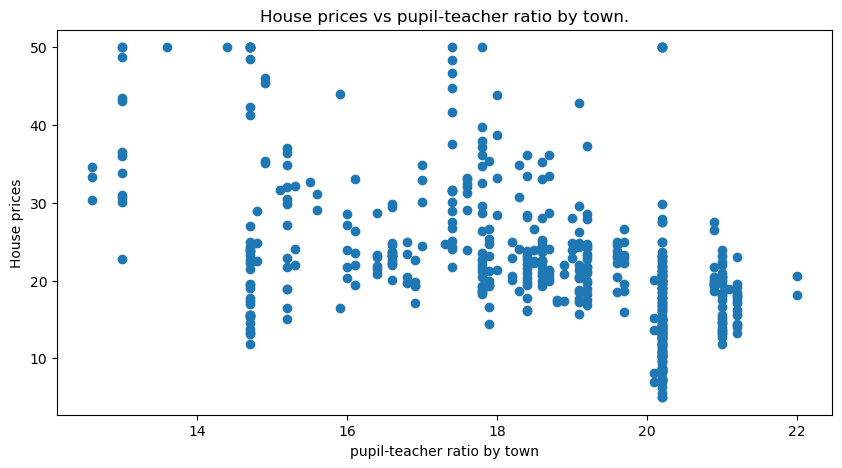

In [17]:
#House prices vs pupil-teacher ratio by town.
plt.figure(figsize=(10,5))
plt.scatter(df.PTRATIO ,df.MEDV)
plt.xlabel("pupil-teacher ratio by town")
plt.ylabel("House prices")
plt.title("House prices vs pupil-teacher ratio by town.");



Houses where the pupil-teacher ration by town is high the majority of the house prices range between $5-25.

[]

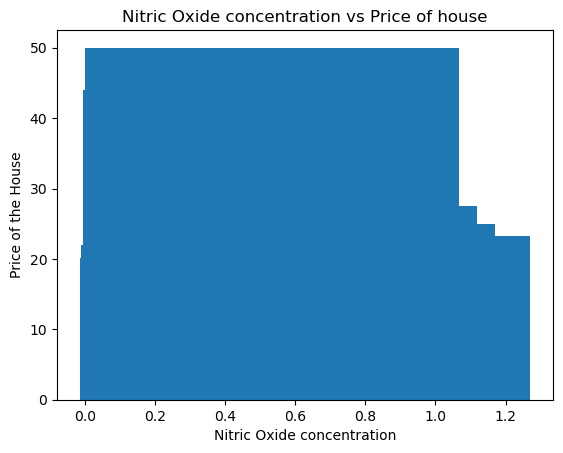

In [18]:
#Noxide vs price of house 
plt.bar(df.NOX,df.MEDV)
plt.xlabel('Nitric Oxide concentration')
plt.ylabel('Price of the House')
plt.title('Nitric Oxide concentration vs Price of house')
plt.plot()

We can observe that if the nitric oxide concentration increases the rate of house decreases


[]

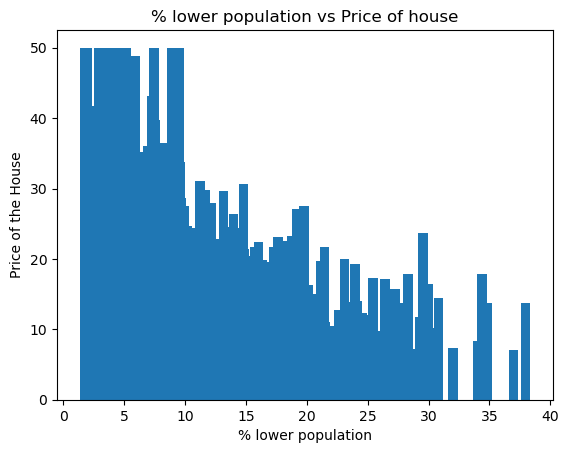

In [19]:
plt.bar(df.LSTAT,df.MEDV)
plt.xlabel('% lower population')
plt.ylabel('Price of the House')
plt.title('% lower population vs Price of house')
plt.plot()

If the lower status population is low price then the houses are high



## 2. Code that creates a training and test set with "MEDV" as your target variable


In [28]:
df = df.dropna()
df = df.drop('AgeGroup', axis =1)

In [29]:
from sklearn.model_selection import train_test_split

X = df.drop("MEDV", axis=1)  # Features (excluding the target variable)
y = df["MEDV"]  # Target variable

# Split the data into a training set (80%) and a test set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)


Training set shape: (370, 13) (370,)
Test set shape: (93, 13) (93,)


## Create and run the linear Regression model


In [40]:
model = LinearRegression()

In [41]:
# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the train set
y_pred_train = model.predict(X_train)

# Make predictions on the test set
y_pred_test = model.predict(X_test)

In [43]:
# Evaluate the model's performance
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

mse_train = mean_squared_error(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

print("Linear Regression Model Performance on test data:")
print("Mean Squared Error:", mse_test)
print("Mean Absolute Error:", mae_test)
print("R2 Score:", r2_test)

print("\nLinear Regression Model Performance on train data:")
print("Mean Squared Error:", mse_train)
print("Mean Absolute Error:", mae_train)
print("R2 Score:", r2_train)

Linear Regression Model Performance on test data:
Mean Squared Error: 11.31535374002142
Mean Absolute Error: 2.5651343583963975
R2 Score: 0.763728456264575

Linear Regression Model Performance on train data:
Mean Squared Error: 18.382475396229843
Mean Absolute Error: 3.032186293179988
R2 Score: 0.7871238858414844


In [33]:
# Make predictions on the test set
y_pred_test = model.predict(X_test)

In [34]:
# Evaluate the model's performance on the test set
test_accuracy = model.score(X_test, y_test) * 100

# Evaluate the model's overall accuracy
model_accuracy = r2_score(y, model.predict(X)) * 100

In [35]:
print("Testing accuracy is:", test_accuracy)
print("Model accuracy is:", model_accuracy)

Testing accuracy is: 76.37284562645749
Model accuracy is: 78.76674403820832


In [36]:
# Create a dataframe with predicted and actual prices
predicted_dataframe = pd.DataFrame({"Predicted_Prices": y_pred_test, "Actual_Prices": y_test})
predicted_dataframe

,Predicted_Prices,Actual_Prices
237,33.616240,31.5
33,13.693688,13.1
42,25.841314,25.3
234,31.971302,29.0
127,14.622022,16.2
...,...,...
24,15.585930,15.6
315,19.630438,16.2
49,16.585250,19.4
179,33.410514,37.2


In [37]:
predicted_dataframe.head(50)

,Predicted_Prices,Actual_Prices
237,33.616240,31.5
33,13.693688,13.1
42,25.841314,25.3
234,31.971302,29.0
127,14.622022,16.2
215,24.603297,25.0
324,25.783351,25.0
223,29.291264,30.1
500,20.366810,16.8
80,29.052401,28.0


In [38]:
# Hypothesis Testing for each predictor variable

# Example: Hypothesis Test for 'RM' (average number of rooms)
from scipy.stats import ttest_ind

high_rm = df[df['RM'] > df['RM'].median()]['MEDV']
low_rm = df[df['RM'] <= df['RM'].median()]['MEDV']

t_stat_rm, p_value_rm = ttest_ind(high_rm, low_rm)

print("Hypothesis Test for RM:")
print(f"T-statistic: {t_stat_rm}, P-value: {p_value_rm}")

# Interpretation for 'RM': If p-value is less than 0.05, reject the null hypothesis
if p_value_rm < 0.05:
    print("There is a significant difference in median home values between areas with high and low average number of rooms.")
else:
    print("There is no significant difference in median home values between areas with high and low average number of rooms.")

# Repeat the process for other predictor variables (e.g., 'LSTAT', 'DIS', 'TAX', etc.)

# Example: Hypothesis Test for 'LSTAT' (% lower status)
high_lstat = df[df['LSTAT'] > df['LSTAT'].median()]['MEDV']
low_lstat = df[df['LSTAT'] <= df['LSTAT'].median()]['MEDV']

t_stat_lstat, p_value_lstat = ttest_ind(high_lstat, low_lstat)

print("\nHypothesis Test for LSTAT:")
print(f"T-statistic: {t_stat_lstat}, P-value: {p_value_lstat}")

# Interpretation for 'LSTAT': If p-value is less than 0.05, reject the null hypothesis
if p_value_lstat < 0.05:
    print("There is a significant difference in median home values between areas with high and low percentage of lower status population.")
else:
    print("There is no significant difference in median home values between areas with high and low percentage of lower status population.")

# Repeat the process for other predictor variables as needed

# Continue with other predictor variables (e.g., 'DIS', 'TAX', etc.)


Hypothesis Test for RM:
T-statistic: 12.010163363611145, P-value: 4.2306114458476134e-29
There is a significant difference in median home values between areas with high and low average number of rooms.

Hypothesis Test for LSTAT:
T-statistic: -17.09163766640042, P-value: 4.3587632994640575e-51
There is a significant difference in median home values between areas with high and low percentage of lower status population.
